In [ ]:
#hide
#default_exp cli
from nbdev.showdoc import show_doc#default_exp cli

In [ ]:
#hide
from hecss.core import *
from hecss.monitor import plot_stats

# CLI

> The command line interface for the HECSS sampler

*Not implemented yet*

In [ ]:
#export
from nbdev import *
from fastcore.script import *


In [ ]:
#vasp
import ase
from ase.calculators.vasp import Vasp2
from ase import units as un
from pathlib import Path

In [ ]:
#export
@call_parse
def hecss_sampler(fname:Param("Basic structure file. Any type recognized by ASE is accepted.", str)="CONTCAR",
                  work_dir:Param("Work directory", str)="WORK",
                  label:Param("Label for the calculations. This got appended to work directory")="hecss",
                  T:Param("Target temperature in Kelvin", float)=300,
                  calc:Param("ASE calculator to be used for the job.\n"+
                             "Supported calculators: VASP (default)"
                             , str)="VASP",
                  N:Param("Number of samples to be generated", int)=10
                  ):
    '''
    Run HECSS parser on the structure in the directory.
    '''
    print(f'Run HECSS on {fname} at {T}K in {work_dir} directory using {calc}.')
    
    src_path = Path(fname)
    
    print(src_path.parent, src_path.name)
    
    if calc=="VASP":
        calculator = Vasp2(label=label, directory=src_path.parent, restart=True)
        cryst = ase.Atoms(calculator.atoms)
        cryst.set_calculator(calculator)
        calculator.set(directory=work_dir)
        calculator.set(command=f'{os.getcwd()}/run-vasp -J "hecss"')
    
    sampler = HECSS(cryst, calculator, T, directory=work_dir)
    samples = sampler.generate(N)
    return samples

In [ ]:
#vasp
samples = hecss_sampler("example/VASP_3C-SiC/1x1x1/sc_1x1x1/CONTCAR", 
                        work_dir='TMP', T=600, N=1000)

Run HECSS on example/VASP_3C-SiC/1x1x1/sc_1x1x1/CONTCAR at 600K in TMP directory using VASP.
example/VASP_3C-SiC/1x1x1/sc_1x1x1 CONTCAR


0it [00:00, ?it/s]

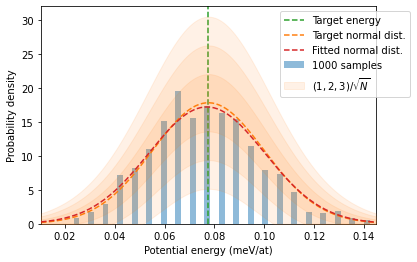

In [ ]:
#vasp
plot_stats(samples, 600)

In [ ]:
from hecss.monitor import plot_stats